In [4]:
import numpy as np
%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import pickle

# 8-1. Optimizers

## Functions

$$
f(x, y) = \frac{1}{20} x^2 + y^2
$$

In [5]:
def f(variables):
    return ((variables['x'] ** 2) * 0.05 + variables['y'] ** 2)

x = np.linspace(-10, 10, 30)
y = np.linspace(-10, 10, 30)

X, Y = np.meshgrid(x, y)
Z = f({'x': X, 'y': Y})

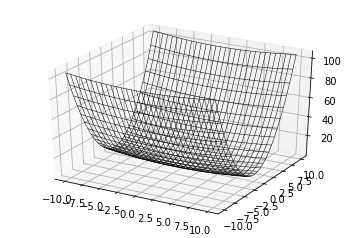

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black', linewidth=0.5)

In [8]:
def gradient(variables, variable_name):
    h = 1e-4
    input2 = variables.copy()
    input2[variable_name] += h
    
    input1 = variables.copy()
    input1[variable_name] -= h
    
    z2 = f(input2)
    z1 = f(input1)
    
    delta_z = z2 - z1
    delta_x = h * 2
    return delta_z / delta_x

In [9]:
gradient({'x': 4.5, 'y': -3.0}, 'x')

0.4499999999918458

## Vanilla SGD

$$
\theta \leftarrow \theta - \eta \frac{\partial L}{\partial w}
$$

In [17]:
current_x = 4.5
current_y = 4.5

for iteration in range(1000):
    ETA = 0.01
    current = {
        'x': current_x,
        'y': current_y
    }
    grad = {
        'x': gradient(current, 'x'),
        'y': gradient(current, 'y'),
    }
    function_output = f(current)
    current_x = current_x - ETA * grad['x']
    current_y = current_y - ETA * grad['y']
    #print("iteration: {}, x: {}, y: {}, output: {}".format(iteration, current_x, current_y, function_output))
    
print("minimum x:{}, y:{}".format(current_x, current_y))

minimum x:1.6546294114674343, y:7.57335322232322e-09


In [42]:
current_x = 4.5
current_y = 4.5

for iteration in range(5000):
    ETA = 0.01
    current = {
        'x': current_x,
        'y': current_y
    }
    grad = {
        'x': gradient(current, 'x'),
        'y': gradient(current, 'y'),
    }
    function_output = f(current)
    current_x = current_x - ETA * grad['x']
    current_y = current_y - ETA * grad['y']
    #print("iteration: {}, x: {}, y: {}, output: {}".format(iteration, current_x, current_y, function_output))
    
print("minimum x:{}, y:{}".format(current_x, current_y))

minimum x:0.030245003819367854, y:7.968885967768458e-18


## Momentum

\begin{align}
v &\leftarrow \beta v + (1 - \beta) \frac{\partial L}{\partial w} \\
\theta &\leftarrow \theta - \eta v
\end{align}

where $\beta$ acts as friction. Usually around `0.9`.

In [44]:
current_x = 4.5
current_y = 4.5

BETA = 0.9

vx = 0.0
vy = 0.0

for iteration in range(1000):
    ETA = 0.01
    current = {
        'x': current_x,
        'y': current_y
    }
    grad = {
        'x': gradient(current, 'x'),
        'y': gradient(current, 'y'),
    }
    vx = BETA * vx + grad['x']
    vy = BETA * vy + grad['y']
    
    current_x = current_x - ETA * vx
    current_y = current_y - ETA * vy
    
print("minimum x:{}, y:{}".format(current_x, current_y))

minimum x:7.020463528798055e-05, y:3.579225378800207e-21


In [45]:
current_x = 4.5
current_y = 4.5

BETA = 0.9

vx = 0.0
vy = 0.0

for iteration in range(5000):
    ETA = 0.01
    current = {
        'x': current_x,
        'y': current_y
    }
    grad = {
        'x': gradient(current, 'x'),
        'y': gradient(current, 'y'),
    }
    vx = BETA * vx + grad['x']
    vy = BETA * vy + grad['y']
    
    current_x = current_x - ETA * vx
    current_y = current_y - ETA * vy
    
print("minimum x:{}, y:{}".format(current_x, current_y))

minimum x:5.310462302733221e-21, y:3.579942939503076e-21


## RMSProp

\begin{align}
s &\leftarrow \beta s + (1 - \beta) \left(\frac{\partial L}{\partial w} \right)^2 \\
\theta &\leftarrow \theta - \eta \frac{\partial L}{\partial \theta} \frac{1}{\sqrt{s + \epsilon}}
\end{align}

where $\beta$ acts as friction around `0.9` and $\epsilon$ is a small number like `1e-8` for numerical stability.

In [49]:
current_x = 4.5
current_y = 4.5

BETA = 0.9
EPSILON = 1e-8

sx = 0.0
sy = 0.0

for iteration in range(1000):
    ETA = 0.01
    current = {
        'x': current_x,
        'y': current_y
    }
    grad = {
        'x': gradient(current, 'x'),
        'y': gradient(current, 'y'),
    }
    sx = BETA * sx + (1 - BETA) * (grad['x'] ** 2)
    sy = BETA * sy + (1 - BETA) * (grad['y'] ** 2)
    
    current_x = current_x - ETA * grad['x'] / np.sqrt(sx + EPSILON)
    current_y = current_y - ETA * grad['y'] / np.sqrt(sy + EPSILON)
    
print("minimum x:{}, y:{}".format(current_x, current_y))

minimum x:-0.004898979483990539, y:3.309816109390423e-21


In [61]:
current_x = 4.5
current_y = 4.5

BETA = 0.9
EPSILON = 1e-8

sx = 0.0
sy = 0.0

for iteration in range(5000):
    ETA = 0.001
    current = {
        'x': current_x,
        'y': current_y
    }
    grad = {
        'x': gradient(current, 'x'),
        'y': gradient(current, 'y'),
    }
    sx = BETA * sx + (1 - BETA) * (grad['x'] ** 2)
    sy = BETA * sy + (1 - BETA) * (grad['y'] ** 2)
    
    current_x = current_x - ETA * grad['x'] / np.sqrt(sx + EPSILON)
    current_y = current_y - ETA * grad['y'] / np.sqrt(sy + EPSILON)
    
print("minimum x:{}, y:{}".format(current_x, current_y))

minimum x:4.666870927179143e-21, y:2.645159853119714e-21


## Adam

\begin{equation}
v \leftarrow \beta_1 v + (1 - \beta_1) \frac{\partial L}{\partial w} \\
s \leftarrow \beta_2 s + (1 - \beta_2) \left(\frac{\partial L}{\partial w} \right)^2 \\
v_{corrected} \leftarrow \frac{v}{1-\beta_1^t} \\
s_{corrected} \leftarrow \frac{s}{1-\beta_2^t} \\
\theta \leftarrow \theta - \eta \frac{v_{corrected}}{\sqrt{s_{corrected} + \epsilon}}
\end{equation}

where $\beta_1$ is around `0.9`, $\beta_2$ is around `0.999` and $\epsilon$ is a small number like `1e-8` for numerical stability.

In [53]:
current_x = 4.5
current_y = 4.5

BETA1 = 0.9
BETA2 = 0.999
EPSILON = 1e-8

vx = 0.0
sx = 0.0
vy = 0.0
sy = 0.0

for iteration in range(1000):
    ETA = 0.01
    current = {
        'x': current_x,
        'y': current_y
    }
    grad = {
        'x': gradient(current, 'x'),
        'y': gradient(current, 'y'),
    }
    vx = BETA1 * vx + (1 - BETA1) * grad['x']
    vy = BETA1 * vy + (1 - BETA1) * grad['y']
    
    sx = BETA2 * sx + (1 - BETA2) * (grad['x'] ** 2)
    sy = BETA2 * sy + (1 - BETA2) * (grad['y'] ** 2)
    
    c_beta1 = BETA1 ** (iteration+1)
    vcx = vx / (1 - c_beta1)
    vcy = vy / (1 - c_beta1)

    c_beta2 = BETA2 ** (iteration+1)
    scx = sx / (1 - c_beta2)
    scy = sy / (1 - c_beta2)

    current_x = current_x - ETA * vcx / np.sqrt(scx + EPSILON)
    current_y = current_y - ETA * vcy / np.sqrt(scy + EPSILON)
    
print("minimum x:{}, y:{}".format(current_x, current_y))

minimum x:0.06483412117195497, y:0.06483408592640541


In [66]:
current_x = 4.5
current_y = 4.5

BETA1 = 0.9
BETA2 = 0.999
EPSILON = 1e-8

vx = 0.0
sx = 0.0
vy = 0.0
sy = 0.0

for iteration in range(5000):
    ETA = 0.01
    current = {
        'x': current_x,
        'y': current_y
    }
    grad = {
        'x': gradient(current, 'x'),
        'y': gradient(current, 'y'),
    }
    vx = BETA1 * vx + (1 - BETA1) * grad['x']
    vy = BETA1 * vy + (1 - BETA1) * grad['y']
    
    sx = BETA2 * sx + (1 - BETA2) * (grad['x'] ** 2)
    sy = BETA2 * sy + (1 - BETA2) * (grad['y'] ** 2)
    
    c_beta1 = BETA1 ** (iteration+1)
    vcx = vx / (1 - c_beta1)
    vcy = vy / (1 - c_beta1)

    c_beta2 = BETA2 ** (iteration+1)
    scx = sx / (1 - c_beta2)
    scy = sy / (1 - c_beta2)

    current_x = current_x - ETA * vcx / np.sqrt(scx + EPSILON)
    current_y = current_y - ETA * vcy / np.sqrt(scy + EPSILON)
    
print("minimum x:{}, y:{}".format(current_x, current_y))

minimum x:2.6827201657106435e-21, y:3.520151103317083e-21
